In [14]:
!pip install pandas
!pip install scikit-learn
!pip install pyLDAvis
!pip install matplotlib
!pip install jieba

In [15]:
!pip install xlsxwriter
!pip install matplotlib
!pip install wordcloud
!pip install snapshot-selenium
!pip install selenium
!pip install snownlp
!pip install openpyxl
!pip install pandas
!pip install little_mallet_wrapper
!pip install pyecharts
!pip install snapshot-pyppeteer

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


In [17]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


# data cleaning

In [3]:
import pandas as pd
import os
import re
from itertools import chain
import xlsxwriter

DATA_DIR = r"/Users/zhanghanyue/Desktop/lofter_dataset.csv"
df = pd.read_csv(DATA_DIR)
df['text'] = df['正文']

def read_txt(file_path):
    with open(file_path, 'r') as file:
        return file.read().splitlines()
stopwords = read_txt("/Users/zhanghanyue/Desktop/stopwords.txt")
isnull = lambda x : True if len(str(x).strip())==0 \
                or (str(x).lower() in ['nan', 'none', r'\N', r'\n'])   \
                else False
                
notnull = lambda x : False if isnull(x) else True
extend_list = lambda x : list(chain(*x))
def cut_sent(para):
    import re
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  
    para = re.sub('([\.!。！？\?])([^”’])', r"\1\n\2", para)  
    para = re.sub('([\.!。！？\?][”’])([^\.!，。！？\?])', r'\1\n\2', para)
    para = para.rstrip()  

    return para.split("\n")

def read_from_dir(path, line_split=False):
    test_file = os.listdir(path)
    list_file = []
    for file in test_file:
        temp =  read_txt(os.path.join(path, file), line_split)
        temp = [xx.strip() for xx in temp]
        if not line_split:
            list_file.append([file, ' '.join(temp)])
        else:
            for i in range(len(temp)):
                list_file.append([file+'_'+str(i), temp[i]])
    return list_file   
def read_txt(path, line_split=True):
    try:
        with open(path, encoding = 'utf-8') as f:
            l = [x.strip() for x in f.readlines() if len(x.strip())!=0]
    except:
        with open(path, encoding='gbk') as f:
            l = [x.strip() for x in f.readlines() if len(x.strip())!=0]
    
    if line_split:
        return l
    else:
        return [' '.join(l)]


def have_chinese(ss):
    for s in ss:
        if s >= u'\u4e00' and s<=u'\u9fa5':
                return True
    return False 

def all_chinese(ss):
    for s in ss:
        if not((s >= u'\u4e00' and s<=u'\u9fa5')):
                return False
    return True

def word_filter(s):
    if len(s)<2:
        return False
    
    if not all_chinese(s.replace(' ', '')):
        return False
        
    if s.split(' ')[0] in stopwords:
        return False
    
    if s.split(' ')[-1] in stopwords:
        return False
        
    return True


def filter_text(s):
    if len(s.strip())<5:
        return False
    if not have_chinese(s.strip()):
        return False
    return True

def remove_aite(text):
    text = re.sub(r"@[^\s]*\s", "", text)
    text = re.sub(r"@[^\s]*$", "", text)
    text = re.sub(r"#[^#]*#", "", text)
    text = re.sub(r"【[^】【]*】", "", text)

    list_replace = ['★', 'з', '」', '∠', '/ω\\','(',')']
    for xx in list_replace:
        text = text.replace(xx, '')


    return text


In [4]:


def remove_emojis(desstr, restr=''):
    try:
        co = re.compile(u'[\U00010000-\U0010ffff]')
    except re.error:
        co = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    return co.sub(restr, desstr)


def remove_whitespace(text):
   
    import re
    text = re.sub(r"\s+", " ", text)
    return text

def DBC2SBC(ustring):
   
    rstring = ""
    for uchar in ustring:
        inside_code = ord(uchar)
        if inside_code == 0x3000:
            inside_code = 0x0020
        else:
            inside_code -= 0xfee0
        if not (0x0020 <= inside_code and inside_code <= 0x7e):
            rstring += uchar
            continue
        rstring += chr(inside_code)
    return rstring



In [5]:
import pandas as pd

df['text'] = df.apply(lambda x : str(x['text']).strip().lower(), axis=1)
df['text']  = df.apply(lambda x : DBC2SBC(x['text']), axis=1)
df['text'] = df.apply(lambda x : remove_whitespace(x['text']), axis=1)
df['text'] = df.apply(lambda x : remove_aite(x['text']), axis=1)
df['text'] = df.apply(lambda x : remove_emojis(x['text']), axis=1)


df['flag'] = df.apply(lambda x :filter_text(x['text']), axis=1)
df = df[df['flag'] ]

list_text = list(df['text'])

In [6]:
df

,作者,标题,发布时间,点赞数量,评论数量,正文,text,flag
0,纳兰妙殊,【盾冬】当你起舞时（万字一发完）,2019/5/7,22904.0,1687.0,* 接复联4。*喜欢A4盾、支持他最后五分钟决定的人就不要往下看了。* 不接受在私信和评论里...,* 接复联4。*喜欢a4盾、支持他最后五分钟决定的人就不要往下看了。* 不接受在私信和评论里...,True
1,三声浪笑（开学好忙延更）,【盾冬】巴基决定不原谅史蒂夫,2019/4/24,17865.0,480.0,summary：巴基决定不原谅史蒂夫。盾冬 接复联4结局 有魔改 甜饼剧透预警！！！！剧透预...,summary:巴基决定不原谅史蒂夫。盾冬 接复联4结局 有魔改 甜饼剧透预警!!!!剧透预...,True
2,克拉德美索,【盾冬】你离开的那几秒钟（19·完结篇）接复联4,2019/5/14,14220.0,1109.0,Summary：你离开的那几秒钟，是你的一生，却也是我巴基•巴恩斯的一生。现在，我要move...,"summary:你离开的那几秒钟,是你的一生,却也是我巴基•巴恩斯的一生。现在,我要move...",True
3,罗密欧酱,美国队长-审判1,2014/6/20,14139.0,141.0,1.在摧毁了九头蛇的最后一个据点后，他们带走了Bucky。Steve被支开，等他发现不对劲再...,"1.在摧毁了九头蛇的最后一个据点后,他们带走了bucky。steve被支开,等他发现不对劲再...",True
4,克拉德美索,【盾冬】你离开的那几秒钟（1）接复联4,2019/4/24,13834.0,842.0,Summary：你离开的那几秒钟，是你的一生，却也是我巴基·巴恩斯的一生。现在，我要move...,"summary:你离开的那几秒钟,是你的一生,却也是我巴基·巴恩斯的一生。现在,我要move...",True
...,...,...,...,...,...,...,...,...
230,七花七夕,【盾冬】超越四倍的逆转未来（一万五的小甜饼，一发完）,2018/6/9,2743.0,98.0,2018年的SteveRogers要回到过去，并且寻求各个时间段的自己帮助。拯救BuckyB...,"2018年的steverogers要回到过去,并且寻求各个时间段的自己帮助。拯救buckyb...",True
231,K.I.D,布鲁克林的来信,2016/5/9,2741.0,94.0,史蒂夫-罗杰斯先生：展信好！收到这封信你一定很惊讶，一半是因为你不认识我，另一半是因为这个年...,"史蒂夫-罗杰斯先生:展信好!收到这封信你一定很惊讶,一半是因为你不认识我,另一半是因为这个年...",True
232,克拉德美索,【盾冬】关于爱与量子纠缠的研究报告（2）（接复联3）,2018/5/14,2731.0,165.0,接复联3结尾剧情，HE。量子纠缠——两个粒子互相纠缠，无论相隔多远，他们永远影响对方。如果我...,"接复联3结尾剧情,he。量子纠缠——两个粒子互相纠缠,无论相隔多远,他们永远影响对方。如果我...",True
233,_千旅,【漫威/多cp】战后的复联大厦总是鸡飞狗跳（8）,2019/5/12,2730.0,27.0,只接受复联4部分设定一jio踢翻意难平，我要自己扛着铲子平了它！轻松向，日常生活的故事，个人...,"只接受复联4部分设定一jio踢翻意难平,我要自己扛着铲子平了它!轻松向,日常生活的故事,个人...",True


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# tfi-df words

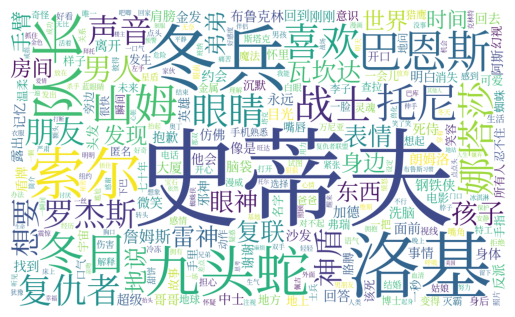

In [7]:
import jieba.analyse
import matplotlib.pyplot as plt

font_path = "./SourceHanSerifCN-Regular.otf"

topk = 10000
word_tfidf = jieba.analyse.extract_tags(' '.join(list_text), topK=topk, withWeight=True)
word_tfidf = [[x[0], x[1]] for x in word_tfidf]
dict_word_tfidf = {x:y for x,y in word_tfidf}
df_wordtfidf = pd.DataFrame(word_tfidf, columns=['word', 'tfidf'])
df_wordtfidf = df_wordtfidf.sort_values(by='tfidf', ascending=False)

df_wordtfidf['flag'] = df_wordtfidf.apply(lambda x :word_filter(x['word']), axis=1)
df_wordtfidf = df_wordtfidf[df_wordtfidf['flag'] ]
df_wordtfidf = pd.DataFrame(df_wordtfidf, columns=['word', 'tfidf'])
df_wordtfidf.to_excel('/Users/zhanghanyue/Desktop/wordstfidf.xlsx', index=False)


dict_word_tfidf = {x:y for x, y in zip(list(df_wordtfidf['word']), list(df_wordtfidf['tfidf']))}
my_cloud = WordCloud(width=1000, height=600, max_words=300,
    background_color='white', font_path=font_path, random_state=50
    ).generate_from_frequencies(dict_word_tfidf)
my_cloud.to_file('/Users/zhanghanyue/Desktop/tfidf_word_cloud.png')

plt.imshow(my_cloud)
plt.axis("off")
plt.show()

In [5]:
import sys
print(sys.version)


3.11.8 (main, Feb 26 2024, 15:36:12) [Clang 14.0.6 ]


# topic modeling

In [2]:
import jieba
import tomotopy as tp
import re


In [9]:
#3333333
def read_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file if line.strip()]
    return stopwords


stopwords = read_txt("/Users/zhanghanyue/Desktop/stopwords.txt")

import jieba.posseg as pseg

meaningless_entities = ['nr','ns', 'm']

def tokenizer(text):
    text = str(text)
    words = pseg.cut(text)
    return [word for word, flag in words if word not in stopwords and len(word) > 1 and not re.match('^[a-zA-Z]+$', word) and flag not in ['nr', 'ns', 'm']]

corpus = tp.utils.Corpus()
if 'text' in df.columns:
    texts = df['text'].astype(str)
else:
    print("Column 'text' not found, using the second last column instead.")
    texts = df.iloc[:, -2].astype(str)
for text in texts:
    corpus.add_doc(tokenizer(text))

In [10]:
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for document in corpus:
    model.add_doc(document)  

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -10.424522006038993
Iteration: 10	Log-likelihood: -10.158917831578488
Iteration: 20	Log-likelihood: -10.049455161340012
Iteration: 30	Log-likelihood: -9.995304933823297
Iteration: 40	Log-likelihood: -9.960354405696267
Iteration: 50	Log-likelihood: -9.94052152509062
Iteration: 60	Log-likelihood: -9.932645723185884
Iteration: 70	Log-likelihood: -9.916697933633603
Iteration: 80	Log-likelihood: -9.903858019673779
Iteration: 90	Log-likelihood: -9.897197715950163


In [11]:
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"Topic{topic_number} {topic_words}\n")

Topic0 朋友 时间 身体 未来 眼神 表情 消失 意识 发现 面前

Topic1 队长 山姆 手臂 电影 旁边 金属 喜欢 房间 刚刚 明明

Topic2 喜欢 事情 爸爸 发现 大厦 故事 兄弟 拒绝 魔法 儿子

Topic3 九头蛇 男人 朗姆洛 抓住 匿名 地方 冬天 家伙 医生 发现

Topic4 洛基 弟弟 孩子 喜欢 复联 可爱 蜘蛛 复仇者 幻视 旺达

Topic5 回答 声音 想要 世界 永远 冬兵 离开 像是 回到 目光

Topic6 身边 电话 担心 所有人 照片 关系 表情 解释 反派 生气

Topic7 娜塔莎 眼睛 沙发 微笑 抱歉 回去 露出 头发 脑袋 人类

Topic8 战士 冬日 复仇者 孩子 宇宙 加德 钢铁侠 地球 阿斯 依旧

Topic9 眼睛 男人 手机 结婚 衣服 嘴唇 手指 男孩 习惯 金发



In [11]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.17805196,
 0.05805231,
 0.047122102,
 0.023450205,
 0.024354199,
 0.020434225,
 0.04500183,
 0.03508602,
 0.55169547,
 0.016751636]

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_topic_distributions = pd.DataFrame(topic_distributions, columns=[f'Topic {i+1}' for i in range(10)])


print(df_topic_distributions.head())


    Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0  0.207306  0.131312  0.060657  0.019744  0.093188  0.028305  0.063976   
1  0.035536  0.018393  0.256706  0.057468  0.065124  0.027450  0.011907   
2  0.234030  0.036957  0.020750  0.026865  0.020992  0.015983  0.021321   
3  0.025570  0.108608  0.194600  0.113898  0.054362  0.169964  0.082188   
4  0.089662  0.047991  0.121743  0.100887  0.185066  0.103346  0.113728   

    Topic 8   Topic 9  Topic 10  
0  0.012015  0.330055  0.053444  
1  0.126553  0.303002  0.097861  
2  0.044982  0.571757  0.006361  
3  0.131438  0.030718  0.088654  
4  0.135908  0.012415  0.089254  


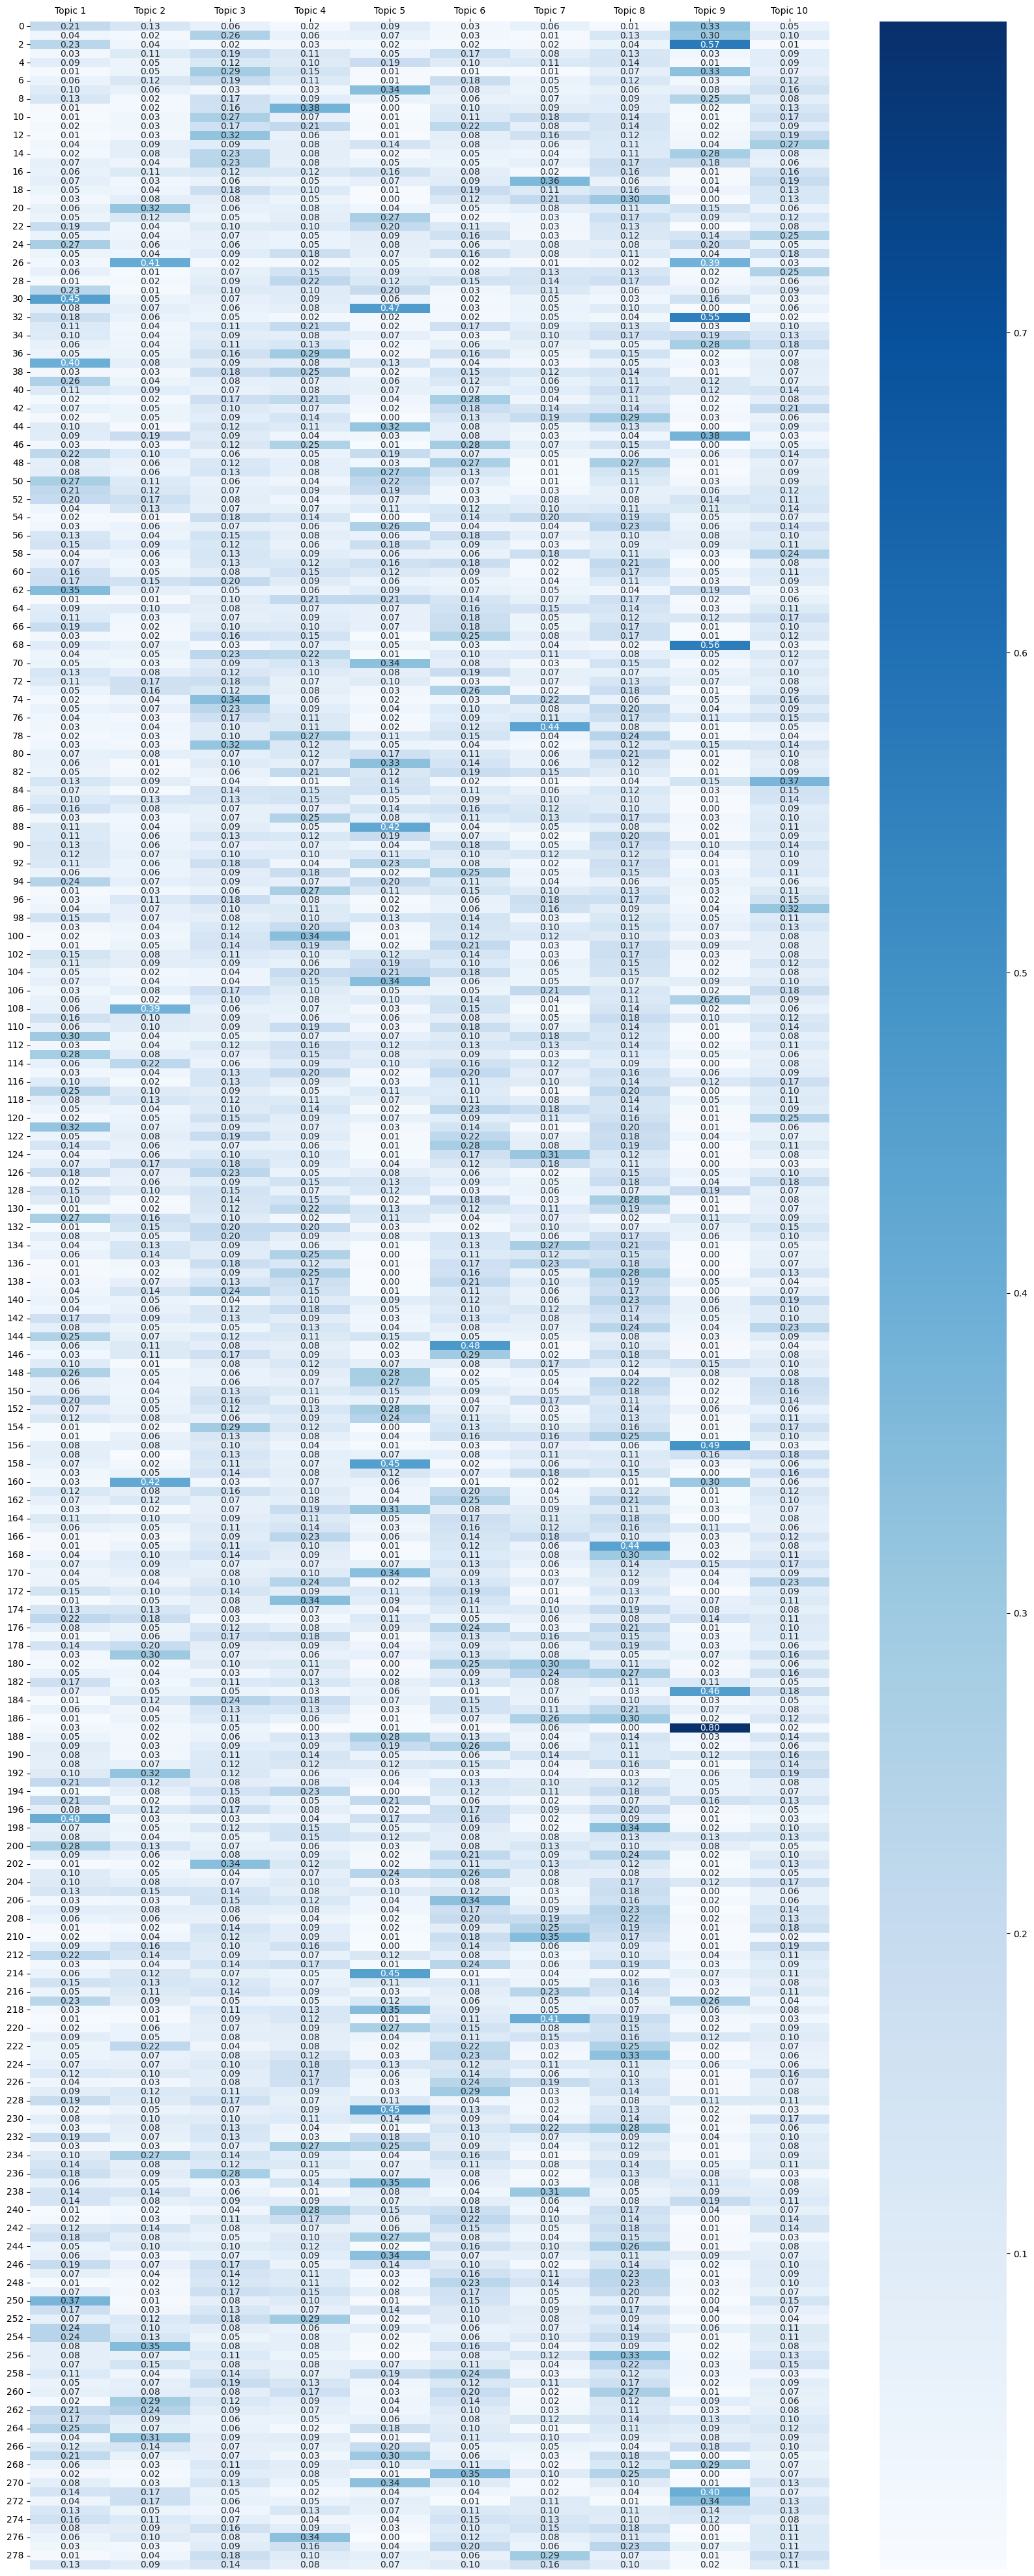

In [16]:

def plot_categories_by_topics_heatmap(df_topic_distributions, output_path=None, color_map='Blues', dim=(16, 40)):
    import seaborn as sns
    import matplotlib.pyplot as plt


    plt.figure(figsize=dim)
    heatmap = sns.heatmap(df_topic_distributions, annot=True, fmt=".2f", cmap=color_map)
    plt.xticks(rotation=45, ha='right') 
    plt.xticks(rotation=45, ha='left')   
    plt.yticks(rotation=0)               
    plt.tight_layout()

 
    heatmap.xaxis.set_ticks_position('top')
    heatmap.xaxis.set_label_position('top')

    if output_path:
        plt.savefig(output_path)
    plt.show()

plot_categories_by_topics_heatmap(df_topic_distributions)


In [14]:
import pandas as pd
name = '1'
d1 = df.__deepcopy__()
list_text = list(d1['text'])
len(d1)

233

In [15]:
import re
import jieba.posseg as pseg
from sklearn.feature_extraction.text import CountVectorizer


def read_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file if line.strip()] 
    return stopwords

stopwords = read_txt("/Users/zhanghanyue/Desktop/stopwords.txt")

meaningless_entities = ['nr', 'ns', 'm'] 

def tokenizer(text):
    text = str(text)
    words = pseg.cut(text)
    return [word for word, flag in words if word not in stopwords and len(word) > 1 and not re.match('^[a-zA-Z]+$', word) and flag not in meaningless_entities]


cv = CountVectorizer(max_features=1000, analyzer='word', 
                     tokenizer=tokenizer, stop_words=stopwords, ngram_range=(1, 1))


list_text = list(d1['text'])  


fea_text = cv.fit_transform(list_text).toarray()
vocab = cv.get_feature_names_out()


term_frequency = fea_text.sum(axis=0)


vectorizer = cv

print(fea_text.shape)


/Users/zhanghanyue/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['##', '即是', '口儿'] not in stop_words.
  warnings.warn(


(233, 1000)


In [16]:
max_features=1000
cv = CountVectorizer(max_features=max_features, analyzer='word', 
                     tokenizer=tokenizer, stop_words=stopwords, ngram_range=(1, 1))

fea_text = cv.fit_transform(list_text).toarray()
vocab = cv.get_feature_names_out()

vectorizer = cv
print(fea_text.shape)

(233, 1000)


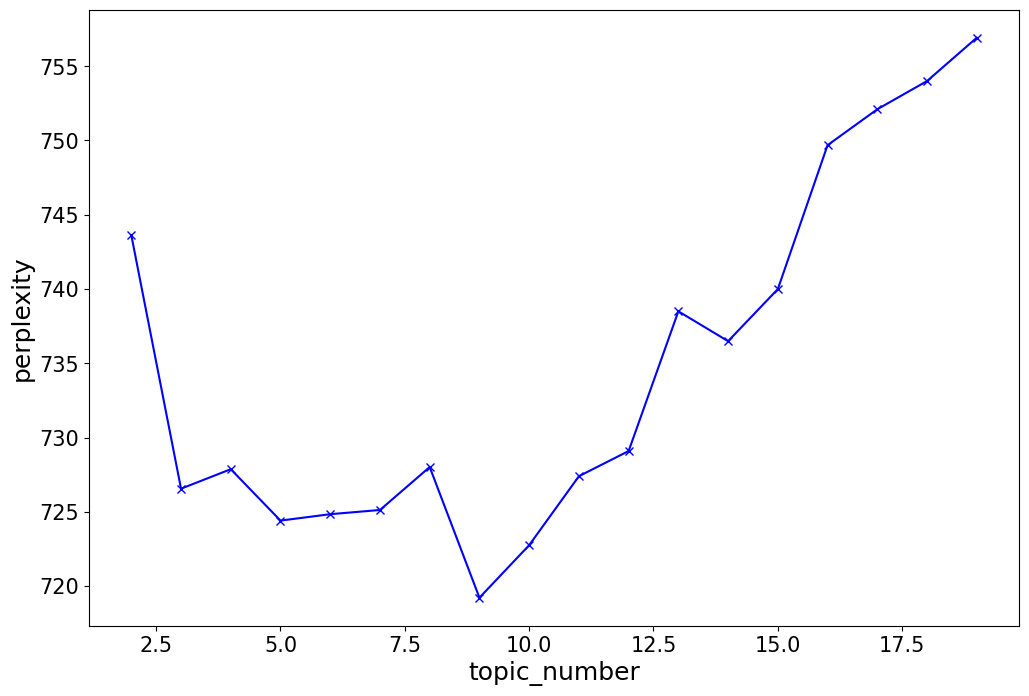

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False

perplexity = []
list_p = []
krange = list(range(2, 20, 1))
for k in krange:
    lda = LatentDirichletAllocation(n_components=k, random_state=1000)
    lda.fit(fea_text)
    p = lda.perplexity(fea_text)
    perplexity.append(p)
    list_p.append([k, p])

dd = pd.DataFrame(list_p, columns=['n_topic', 'perplexity' ])
dd.to_excel(os.path.join('/Users/zhanghanyue/Desktop/lda_perplexity.xlsx'), index=False)

plt.figure()
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(krange, perplexity, 'bx-')
plt.xlabel("topic_number", fontsize=18)
plt.ylabel("perplexity", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(os.path.join('/Users/zhanghanyue/Desktop/lda_perplexity.png'), dpi=400)
plt.show() 

In [18]:
pip install pyLDAvis scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

n_topics= 7
lda = LatentDirichletAllocation(n_components=n_topics)

vec_lda = lda.fit_transform(fea_text)
d1['topic_lda'] = [list(t).index(np.max(t)) for t in vec_lda]

for i in range(vec_lda.shape[1]):
    d1[i] = list(vec_lda[:, i])

d1.to_excel(os.path.join('/Users/zhanghanyue/Desktop/topic_lda.xlsx'), index=False)

list_res = []
n_top_words = 30 
for i, comp in enumerate(lda.exp_dirichlet_component_):
    terms_comp = zip(vocab, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:n_top_words]
    list_res.append(["topic_"+str(i), sorted_terms])


dd = pd.DataFrame(list_res, columns = ['topic', 'terms'])
dd = dd.explode('terms')
dd['word'] = dd.apply(lambda x:x['terms'][0], axis=1)
dd['score'] = dd.apply(lambda x:x['terms'][1], axis=1)
dd.drop("terms", axis=1, inplace=True)

dd.to_excel(os.path.join('/Users/zhanghanyue/Desktop/topic_keywords_lda.xlsx'), index=False)



In [ ]:

lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(fea_text)


data = pyLDAvis.prepare(topic_term_dists=lda.components_,
                        doc_topic_dists=lda.transform(fea_text),
                        doc_lengths=fea_text.sum(axis=1),
                        vocab=vocab,
                        term_frequency=term_frequency)


pyLDAvis.save_html(data, 'lda_visualization.html')
pyLDAvis.show(data)


/Users/zhanghanyue/anaconda3/envs/py39/lib/python3.9/site-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [02/Jul/2024 23:36:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:36:23] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:36:24] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:36:24] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:36:24] code 404, message Not Found
127.0.0.1 - - [02/Jul/2024 23:36:24] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Jul/2024 23:37:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:37:57] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:37:57] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:37:57] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:53:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:53:46] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:53:46] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:53:46] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Jul/2024 23:54:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - 

# Sentiment Analysis

In [7]:
import snownlp
import pandas as pd
import jieba.posseg as pseg
import re


def sentiment_snownlp_zh(sentence):
    score = snownlp.SnowNLP(sentence).sentiments
    if (score < 0.6) and (score > 0.4):
        all_polarity = 'neu'
        all_score = (score - 0.5)
    elif score >= 0.6:
        all_polarity = 'pos'
        all_score = (score - 0.5) * 2
    else:
        all_polarity = 'neg'
        all_score = (score - 0.5) * 2
    return all_polarity, all_score



In [10]:

stopwords = read_txt("/Users/zhanghanyue/Desktop/stopwords.txt")

meaningless_entities = ['nr', 'ns', 'm']  


In [11]:
def tokenizer(text):
    text = str(text)
    words = pseg.cut(text)
    return [word for word, flag in words if word not in stopwords and len(word) > 1 and not re.match('^[a-zA-Z]+$', word) and flag not in meaningless_entities]


def fre(text):
    list_word = tokenizer(str(text))
    list_p = []
    list_n = []
    pos = 0
    neg = 0
    all = len(list_word)
    for w in list_word:
        sentiment_score = snownlp.SnowNLP(w).sentiments
        if sentiment_score >= 0.6:
            pos += 1
            list_p.append(w)
        elif sentiment_score <= 0.4:
            neg += 1
            list_n.append(w)
    return ' '.join(list(set(list_p))), pos, ' '.join(list(set(list_n))), neg, all - pos - neg


df['Positive words in the text'], df['Positive words count'], df['Negative words in the text'], df['Negative words count'], df['Neutral words count'] = zip(*df.apply(lambda x: fre(x['text']), axis=1))



In [12]:
df.to_excel('/Users/zhanghanyue/Desktop/sentiment analysis result.xlsx', index=False)

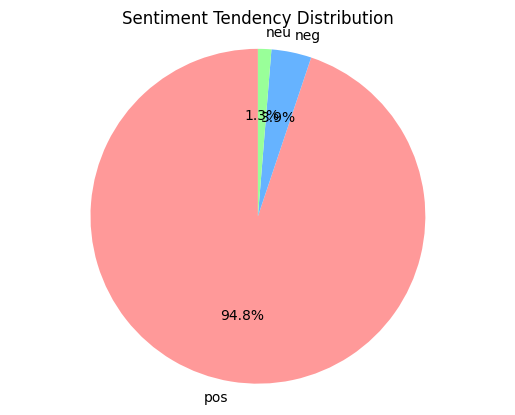

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('/Users/zhanghanyue/Desktop/sentiment analysis result.xlsx', engine='openpyxl')

df['sentiment tendency'], df['sentiment score'] = \
zip(*df.apply(lambda x : sentiment_snownlp_zh(x['text']), axis=1))

tendency_counts = df['sentiment tendency'].value_counts()


fig, ax = plt.subplots()
ax.pie(tendency_counts, labels=tendency_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax.axis('equal')  


plt.title('Sentiment Tendency Distribution')


plt.savefig('/Users/zhanghanyue/Desktop/sentiment_pie_chart.png')


plt.show()


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import os
import snownlp


def tokenizer(text):
    text = str(text)
    words = pseg.cut(text)
    return [word for word, flag in words if word not in stopwords and len(word) > 1 and not re.match('^[a-zA-Z]+$', word) and flag not in meaningless_entities]


df = pd.read_excel('/Users/zhanghanyue/Desktop/sentiment analysis result.xlsx', engine='openpyxl')

df['Negative words in the text'] = df['Negative words in the text'].fillna('').astype(str)


all_negative_words = ' '.join(df['Negative words in the text']).split()
list_neg = list(set(all_negative_words))

cv = CountVectorizer(analyzer='word', tokenizer=tokenizer, stop_words=['洛基','队长','清淡','开玩笑','东西','不到', '活动', '老马', '屁股', '不太',  '黄色', '一点点'], vocabulary=list(list_neg), ngram_range=(1, 1))
fre_matrix = cv.fit_transform(list(df['text'])).toarray()
fre_matrix = cv.fit_transform(list(df['text'])).toarray()
fre_matrix = np.sum(fre_matrix, axis=0).tolist()
word_fre = [[x, y] for x, y in zip(cv.get_feature_names_out(), fre_matrix)]
dict_word_fre = {x: y for x, y in word_fre}
df_wordfre = pd.DataFrame(word_fre, columns=['word', 'frequency'])
df_wordfre = df_wordfre.sort_values(by='frequency', ascending=False)


In [75]:
df_wordfre.to_excel('/Users/zhanghanyue/Desktop/Negative word frequency statistics.xlsx', index=False)
dict_word_fre = {x: y for x, y in zip(list(df_wordfre['word']), list(df_wordfre['frequency']))}

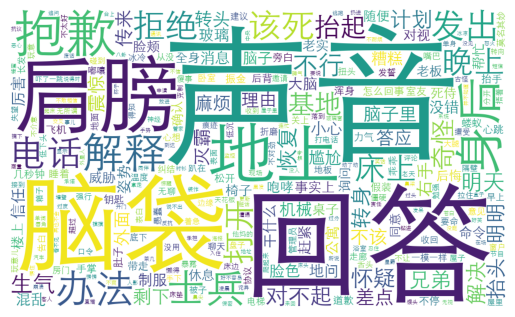

In [76]:
font_path = "/System/Library/Fonts/STHeiti Light.ttc"

my_cloud = WordCloud(width=1000, height=600, max_words=300, 
                    background_color='white', font_path=font_path, random_state=50).generate_from_frequencies(dict_word_fre)
my_cloud.to_file(os.path.join('/Users/zhanghanyue/Desktop/Negative word frequency word cloud map.png'))

plt.imshow(my_cloud)
plt.axis("off")
plt.show()

In [68]:
df = pd.read_excel('/Users/zhanghanyue/Desktop/sentiment analysis result.xlsx', engine='openpyxl')

df['Positive words in the text'] = df['Positive words in the text'].fillna('').astype(str)


all_negative_words = ' '.join(df['Positive words in the text']).split()
list_neg = list(set(all_negative_words))

cv = CountVectorizer(analyzer='word', tokenizer=tokenizer, stop_words=['九头蛇','娜塔莎','山姆','感到'], vocabulary=list(list_neg), ngram_range=(1, 1))
fre_matrix = cv.fit_transform(list(df['text'])).toarray()
fre_matrix = cv.fit_transform(list(df['text'])).toarray()
fre_matrix = np.sum(fre_matrix, axis=0).tolist()
word_fre = [[x, y] for x, y in zip(cv.get_feature_names_out(), fre_matrix)]
dict_word_fre = {x: y for x, y in word_fre}
df_wordfre = pd.DataFrame(word_fre, columns=['word', 'frequency'])
df_wordfre = df_wordfre.sort_values(by='frequency', ascending=False)

In [69]:
df_wordfre.to_excel('/Users/zhanghanyue/Desktop/Positive word frequency statistics.xlsx', index=False)
dict_word_fre = {x: y for x, y in zip(list(df_wordfre['word']), list(df_wordfre['frequency']))}

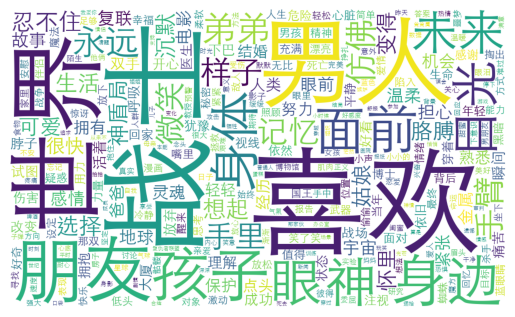

In [73]:
font_path = "/System/Library/Fonts/STHeiti Light.ttc"
my_cloud = WordCloud(width=1000, height=600, max_words=300, 
                    background_color='white', font_path=font_path, random_state=50).generate_from_frequencies(dict_word_fre)
my_cloud.to_file(os.path.join('/Users/zhanghanyue/Desktop/Negative word frequency word cloud map.png'))

plt.imshow(my_cloud)
plt.axis("off")
plt.show()

In [ ]:
!pip install spacy


In [ ]:
python -m spacy download zh_core_web_trf
